In [1]:
import pickle
from scipy.io import loadmat,savemat
import numpy as np
from numpy import clip
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
#plt.rcParams['axes.color_cycle']='r'
plt.rcParams['lines.linewidth'] = 1.5

In [2]:
from mealpy.human_based import TLO
from mealpy.physics_based import EO
from mealpy.math_based import CGO,GBO

In [3]:
import matlab.engine

In [4]:
eng = matlab.engine.start_matlab()

In [5]:
counter = 0
results_hist = []
last_run = None
LC=0.01
def run_sim(x0):
    global last_run,lowerbound,upperbound,LC
    P1,I1,D1,P2,I2,D2=x0
    inputs = loadmat("Input.mat")
    inp_pos = [P1,I1,D1,P2,I2,D2]
    inp_pos= clip(inp_pos, lowerbound, upperbound)
    inputs["P1"] = inp_pos[0];inputs["I1"] = inp_pos[1];inputs["D1"] = inp_pos[2];
    inputs["P2"] = inp_pos[3];inputs["I2"] = inp_pos[4];inputs["D2"] = inp_pos[5];
    inputs["LC"] = LC
    savemat("Input.mat",inputs)
    eng.model_run(nargout=0)
    outputs = loadmat("Output.mat")
    last_run = outputs
    return outputs

def cost(x0,save=False):
    data = run_sim(x0)
    c = data["cost"][0][0]
    return c

def f(x):
    n_particles = x.shape[0]
    j = [cost(x[i]) for i in range(n_particles)]
    return np.array(j)

In [6]:
def loadData():
    # for reading also binary mode is important
    dbfile = open('MATLAB_OPT_Results', 'rb')     
    db = pickle.load(dbfile)
    for keys in db:
        ##print(keys, '=>', db[keys])
        pass
    dbfile.close()
    return db

In [7]:
def get_point(results):
    point={}
    point["P1"] = results["P1"][0][0];point["I1"] = results["I1"][0][0];point["D1"] = results["D1"][0][0]
    point["P2"] = results["P2"][0][0];point["I2"] = results["I2"][0][0];point["D2"] = results["D2"][0][0]
    #point = list(point.values())
    return point

In [8]:
verbose = True  # Print out the training results
epoch = 10  # Number of iterations / generations / epochs
pop_size = 10  # Populations size (Number of individuals / Number of solutions)
lowerbound = [0,0,0,0,0,0]
upperbound = [1,1,1,1,1,1]
problem_dict1 = {
    "fit_func": cost,
    "lb": lowerbound,
    "ub": upperbound,
    "minmax": "min",
    "verbose": True,
    }

In [9]:
cost(6*[0.5])

0.04191466817685144

In [10]:
TLBO_sol = TLO.BaseTLO(problem_dict1,epoch=epoch, pop_size=pop_size)
EO_sol = EO.BaseEO(problem_dict1,epoch=epoch, pop_size=pop_size)
CGO_sol = CGO.OriginalCGO(problem_dict1,epoch=epoch, pop_size=pop_size)
GBO_sol = GBO.OriginalGBO(problem_dict1,epoch=epoch, pop_size=pop_size)

In [11]:
TLBO_solve= TLBO_sol.solve()

> Epoch: 1, Current best: 0.022076755774114318, Global best: 0.022076755774114318, Runtime: 3.91554 seconds
> Epoch: 2, Current best: 0.019983612700393356, Global best: 0.019983612700393356, Runtime: 3.90257 seconds
> Epoch: 3, Current best: 0.01854208132261394, Global best: 0.01854208132261394, Runtime: 3.84073 seconds
> Epoch: 4, Current best: 0.017991625149794372, Global best: 0.017991625149794372, Runtime: 3.85473 seconds
> Epoch: 5, Current best: 0.017635885900071462, Global best: 0.017635885900071462, Runtime: 3.87561 seconds
> Epoch: 6, Current best: 0.017125057178610806, Global best: 0.017125057178610806, Runtime: 3.85669 seconds
> Epoch: 7, Current best: 0.016937941848572294, Global best: 0.016937941848572294, Runtime: 3.93349 seconds
> Epoch: 8, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 4.14293 seconds
> Epoch: 9, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 3.89060 seconds
> Epoch: 10, Current best: 0.0

In [12]:
EO_solve= EO_sol.solve()

> Epoch: 1, Current best: 0.034283916349493314, Global best: 0.034283916349493314, Runtime: 2.11535 seconds
> Epoch: 2, Current best: 0.03490503996270592, Global best: 0.034283916349493314, Runtime: 2.11734 seconds
> Epoch: 3, Current best: 0.03490503996270592, Global best: 0.034283916349493314, Runtime: 2.14327 seconds
> Epoch: 4, Current best: 0.03490503996270592, Global best: 0.034283916349493314, Runtime: 2.09540 seconds
> Epoch: 5, Current best: 0.04288670193628594, Global best: 0.034283916349493314, Runtime: 2.13230 seconds
> Epoch: 6, Current best: 0.03624493140091455, Global best: 0.034283916349493314, Runtime: 2.16026 seconds
> Epoch: 7, Current best: 0.03174129706643879, Global best: 0.03174129706643879, Runtime: 2.13227 seconds
> Epoch: 8, Current best: 0.032160047322990666, Global best: 0.03174129706643879, Runtime: 2.08642 seconds
> Epoch: 9, Current best: 0.030460995007855343, Global best: 0.030460995007855343, Runtime: 2.11136 seconds
> Epoch: 10, Current best: 0.0304839

In [13]:
CGO_solve= CGO_sol.solve()

> Epoch: 1, Current best: 0.018830248151192896, Global best: 0.018830248151192896, Runtime: 7.71438 seconds
> Epoch: 2, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.64756 seconds
> Epoch: 3, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.76636 seconds
> Epoch: 4, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.90236 seconds
> Epoch: 5, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.81511 seconds
> Epoch: 6, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.76824 seconds
> Epoch: 7, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.67050 seconds
> Epoch: 8, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.84703 seconds
> Epoch: 9, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 7.76924 seconds
> Epoch: 10, Current best: 0

In [14]:
GBO_solve= GBO_sol.solve()

> Epoch: 1, Current best: 0.03100674624302543, Global best: 0.03100674624302543, Runtime: 1.94680 seconds
> Epoch: 2, Current best: 0.028638722170420815, Global best: 0.028638722170420815, Runtime: 1.93284 seconds
> Epoch: 3, Current best: 0.028864444643692644, Global best: 0.028638722170420815, Runtime: 1.94380 seconds
> Epoch: 4, Current best: 0.020300450903311337, Global best: 0.020300450903311337, Runtime: 1.91691 seconds
> Epoch: 5, Current best: 0.017340873776244894, Global best: 0.017340873776244894, Runtime: 1.91784 seconds
> Epoch: 6, Current best: 0.021164728869206954, Global best: 0.017340873776244894, Runtime: 1.92984 seconds
> Epoch: 7, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 1.93882 seconds
> Epoch: 8, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 1.93882 seconds
> Epoch: 9, Current best: 0.016924935176992974, Global best: 0.016924935176992974, Runtime: 1.92486 seconds
> Epoch: 10, Current best: 0.0

In [15]:
TLBO_solve

(array([1., 1., 1., 1., 1., 1.]), 0.016924935176992974)

In [17]:
TLBO_solve[1],EO_solve[1],CGO_solve[1]

(0.016924935176992974, 0.030460995007855343, 0.016924935176992974)

In [18]:
results_EO = run_sim(EO_solve[0])
results_TLBO = run_sim(TLBO_solve[0])
results_CGO = run_sim(CGO_solve[0])
results_GBO = run_sim(GBO_solve[0])

In [19]:
t = results_TLBO["t_var"]
#t_true = np.where(t<=6,True,False)
#t = np.array(t)[t_true]

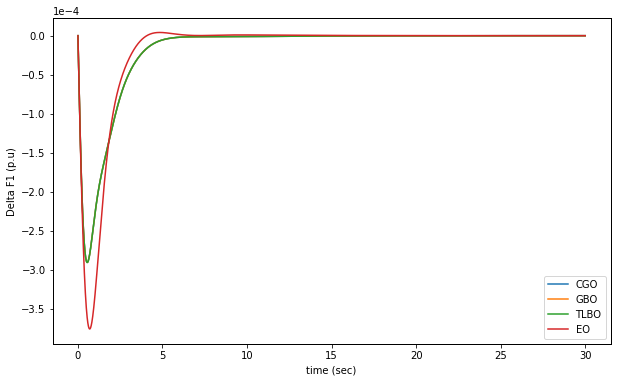

In [21]:
fig = plt.subplots(figsize=[10,6])
plt.plot(t,results_CGO["df1"],label='CGO')
plt.plot(t,results_GBO["df1"],label='GBO')
plt.plot(t,results_TLBO["df1"],label='TLBO')
plt.plot(t,results_EO["df1"],label='EO')
#plt.title("",)
plt.ylabel("Delta F1 (p.u)")
plt.xlabel("time (sec)")
#ticker = matplotlib.ticker.EngFormatter(unit='')
#fig[1].yaxis.set_major_formatter(ticker)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,0))
plt.setp(fig[1].spines.values(), linewidth=1)
#plt.setp(fig[1].yaxis.label)
plt.legend()
plt.savefig("fig1.png",dpi=400)

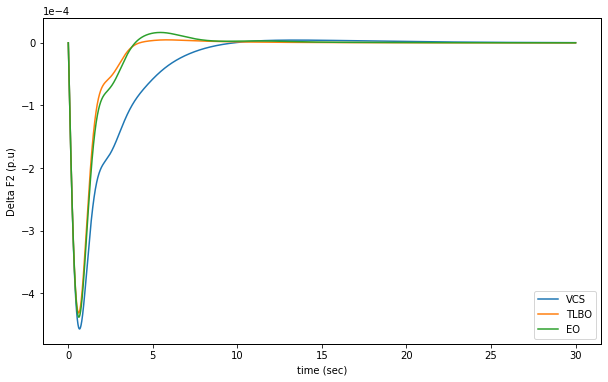

In [136]:
fig = plt.subplots(figsize=[10,6])
plt.plot(t,results_VCS["df2"],label='VCS')
plt.plot(t,results_TLBO["df2"],label='TLBO')
plt.plot(t,results_EO["df2"],label='EO')
#plt.title("",)
plt.ylabel("Delta F2 (p.u)")
plt.xlabel("time (sec)")
#ticker = matplotlib.ticker.EngFormatter(unit='')
#fig[1].yaxis.set_major_formatter(ticker)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,0))
plt.setp(fig[1].spines.values(), linewidth=1)
#plt.setp(fig[1].yaxis.label)
plt.legend()
plt.savefig("fig2.png",dpi=400)

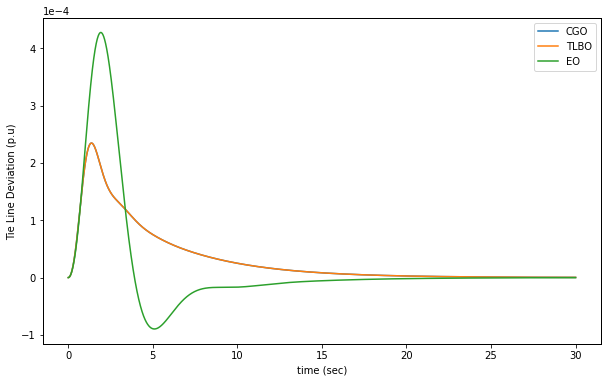

In [23]:
fig = plt.subplots(figsize=[10,6])
plt.plot(t,results_CGO["df_tie"],label='CGO')
plt.plot(t,results_TLBO["df_tie"],label='TLBO')
plt.plot(t,results_EO["df_tie"],label='EO')
#plt.title("",)
plt.ylabel("Tie Line Deviation (p.u)")
plt.xlabel("time (sec)")
#ticker = matplotlib.ticker.EngFormatter(unit='')
#fig[1].yaxis.set_major_formatter(ticker)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,0))
plt.setp(fig[1].spines.values(), linewidth=1)
#plt.setp(fig[1].yaxis.label)
plt.legend()
plt.savefig("fig3.png",dpi=400)